# Проект: Исследование стартапов
- Автор: Сурков Алексей Александрович  
- Дата: 27.01.2025

## Введение

Поле для вашего введения: описания контекста и цели проекта целом. Чтобы изменить содержимое ячейки, дважды нажмите на неё (или нажмите «Ввод»).
### Цели и задачи проекта  

Подготовить датасет и проверить, что данные могут быть использованы для анализа, а также ответить на вопросы заказчика, как о предобработке, так и о значении данных для бизнеса.  
Нам предстоит принять решения:  
* по каким столбцам можно объединять данные из разных таблиц;  
* можно ли доверять данным о сотрудниках стартапов и их образовании;  
* что значат покупки за 0 или за 1 доллар;  
* какая цена в зависимости от категории стартапов и количества раундов финансирования перед его покупкой;  
* как рассчитать и отобразить численные показатели и динамику.

# Описание данных

### Таблица acquisition  
Содержит информацию о покупках одними компаниями других компаний:  
- id — идентификатор покупки.
- acquiring_company_id — идентификатор покупающей компании.
- acquired_company_id — идентификатор покупаемой компании.
- term_code — варианты расчёта.
- price_amount — сумма сделки.
- acquired_at — дата сделки.  
### Таблица company_and_rounds  
Содержит информацию о компаниях и раундах финансирования:  
- company ID — идентификатор компании.
- name — название компании.
- category code — категория области деятельности компании.
- status — статус компании.
- founded at — дата инвестирования.
- closed at — дата закрытия компании.
- domain — официальный сайт компании.
- network username — ник компании в сети.
- country code — код страны компании.
- investment rounds — число инвестиционных раундов.
- funding rounds — число раундов финансирования.
- funding total — сумма финансирования.
- milestones — вехи финансирования.
- funding round id — идентификатор этапа финансирования.
- company id — идентификатор компании.
- funded at — дата финансирования.
- funding round type — тип финансирования.
- raised amount — сумма финансирования.
- pre money valuation — предварительная денежная оценка.
- participants — число участников.
- is first round — является ли раунд первым.
- is last round — является раунд последним.
### Таблица education  
Содержит информацию об образовании сотрудника:  
- id — идентификатор записи об образовании.
- person_id — идентификатор работника.
- instituition — название учебного заведения.
- graduated_at — дата получения образования.
### Таблица people  
Содержит информацию о сотрудниках:  
- id — идентификатор сотрудника.
- first_name — имя сотрудника.
- last_name — фамилия сотрудника.
- company_id — идентификатор компании.
- network_username — ник в социальных сетях.
### Таблица degrees  
Содержит информацию о типе образования сотрудника:  
- id — идентификатор записи.
- object_id — идентификатор сотрудника.
- degree_type — тип образования.
- subject — специальность.
### Дополнительные таблицы  

Эти таблицы не требуются для выполнения проекта, но связаны с исследуемыми данными:  
- fund.csv
- investment.csv
### Таблица fund  
Содержит информацию о фондах:  
- id — идентификатор фонда.
- name — название фонда.
- category_code — категория области деятельности компании.
- founded_at — дата создания фонда.
- domain — сайт фонда.
- network_username — ник фонда в сети.
- country_code — код страны фонда.
- investment_rounds — число инвестиционных раундов.
- invested_companies — число профинансированных компаний.
- milestones — вехи финансирования.
### Таблица investment  
Содержит информацию о раундах инвестирования:  
- id — идентификатор этапа инвестирования.
- funding_round_id — идентификатор раунда инвестирования.
- company_id — индентификатор компании.
- funding_round_type — тип финансирования.
- fund_id — идентификатор фонда.

### Содержимое проекта   
* Шаг 1. Знакомство с данными: загрузка и первичная предобработка  
* Шаг 2. Предобработка данных, предварительное исследование  
* Шаг 3. Исследовательский анализ объединённых таблиц  
* Шаг 4. Итоговый вывод и рекомендации


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* degrees.csv
* education.csv
* fund.csv
* investment.csv
* people.csv

Они находятся в папке datasets, если вы выполняете работу на платформе. В случае, если вы делаете работу локально, доступ к файлам в папке можно получить по адресу `https://code.s3.yandex.net/datasets/` + имя файла.

### 1.1. Вывод общей информации, исправление названия столбцов

In [1]:
# устанавливаем библиотеку phik
!pip install phik

In [2]:
# Импортируем библиотеку pandas
import pandas as pd

In [3]:
# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

 Лучше устанавливать библиотеки в начале, т.к это помогает избежать повторного импорта и экономит время.

In [5]:
base_url= 'https://code.s3.yandex.net/datasets/'
# выгружаем данные 
acquisition=pd.read_csv( base_url + 'acquisition.csv')
company_and_rounds= pd.read_csv(' 
                                company_and_rounds.csv')
people= pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')
education= pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
degrees= pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')
# Дополнительные таблицы
fund= pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')
investment= pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')

In [6]:
# Выгружаем данные из датасета
acquisition.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01



* Загрузите все данные по проекту.

In [7]:
# Выводим информацию о датафрейме и считаем % пропусков 
acquisition.info()
round(acquisition.isna().sum()/len(acquisition)*100,2) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


id                       0.00
acquiring_company_id     0.00
acquired_company_id      0.00
term_code               80.54
price_amount             0.00
acquired_at              0.31
dtype: float64

Таблица acquisition содержит 9407 строк и 6 столбцов.
В столбце term_code (80 %) пропусков   в столбце  acquired_at  меньше (1%)- можно оставить , как есть. Типы данных соответствуют , но лучше  столбец  acquired_at привести к типу дата .

In [8]:
# Выводим информацию о датафрейме и считаем % пропусков 
company_and_rounds.info()
round(company_and_rounds.isna().sum()/len(company_and_rounds)*100,2) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

company  ID               0.14
name                      0.14
category  code           33.93
status                    0.14
founded  at              49.51
closed  at               98.42
domain                   32.43
network  username        56.13
country  code            50.13
investment  rounds        0.14
funding  rounds           0.14
funding  total            0.14
milestones                0.14
funding  round  id       75.70
company  id              75.70
funded  at               75.81
funding  round  type     75.70
raised  amount           75.70
pre  money  valuation    75.70
participants             75.70
is  first  round         75.70
is  last  round          75.70
dtype: float64

In [9]:
# Выгружаем данные из датасета
company_and_rounds.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Выводим количество пропущенных строк
company_and_rounds.isna().sum()

company  ID                 302
name                        302
category  code            73888
status                      302
founded  at              107818
closed  at               214325
domain                    70615
network  username        122240
country  code            109167
investment  rounds          302
funding  rounds             302
funding  total              302
milestones                  302
funding  round  id       164846
company  id              164846
funded  at               165094
funding  round  type     164846
raised  amount           164846
pre  money  valuation    164846
participants             164846
is  first  round         164846
is  last  round          164846
dtype: int64

Таблица company_and_rounds содержит 217774 строк и 22 столбца.
Во всех столбцах есть пропуски, нужно привести к нижнему регистру и сделать нижнее подчеркивание.

In [11]:
# Выгружаем данные из датасета
people.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [12]:
# Выводим информацию о датафрейме и считаем % пропусков
people.info()
round(people.isna().sum()/len(people)*100,2) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


id                   0.00
first_name           0.00
last_name            0.00
company_id          84.73
network_username    82.86
dtype: float64

Таблица people содержит 223709 строк и 5 столбцов.
В столбце company_id   почти (85 %) пропусков   в столбце  network_username  почти  (83%).   
Типы данных соответствуют, для удобстава company_id можно привести к int64 

In [13]:
# Выгружаем данные из датасета
education.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [14]:
# Выводим информацию о датафрейме и считаем % пропусков
education.info()
round(education.isna().sum()/len(education)*100,2) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


id               0.00
person_id        0.00
instituition     0.05
graduated_at    47.04
dtype: float64

Таблица education содержит 109610 строк и 4 столбца. В столбце graduated_at  (47 %) пропусков 
Типы данных соответствуют, для удобстава graduated_a можно привести к date

In [15]:
# Выгружаем данные из датасета
degrees.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [16]:
# Выводим информацию о датафрейме и считаем % пропусков 
degrees.info()
round(degrees.isna().sum()/len(degrees)*100,2) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


id              0.00
object_id       0.00
degree_type    10.23
subject        25.83
dtype: float64

Таблица degrees содержит 109610 строк и 4 столбца. В столбце degree_type  почти (10 %) пропусков в столбце subject   почти (26%).
Типы данных соответствуют, для удобстава object_id  можно привести к int64

In [17]:
# Выгружаем данные из датасета
fund.head()

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


In [18]:
# Выводим информацию о датафрейме и считаем % пропусков 
fund.info()
round(fund.isna().sum()/len(fund)*100,2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


id                     0.00
name                   0.02
founded_at            60.48
domain                36.82
network_username      81.56
country_code          39.47
investment_rounds      0.00
invested_companies     0.00
milestones             0.00
dtype: float64

Таблица fund содержит 11652 строк и 9 столбцов. В столбцах п founded_at  (60 %), domain (37%),network_username (81%), country_code  (39%), пропусков. Типы данных соответствуют, для удобстава founded_at можно привести к date.

In [19]:
# Выгружаем данные из датасета
investment.head()

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


In [20]:
# Выводим информацию о датафрейме и считаем % пропусков 
investment.info()
round(investment.isna().sum()/len(investment)*100,2) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


id                  0.0
funding_round_id    0.0
company_id          0.0
fund_id             0.0
dtype: float64

Таблица investment содержит 61403  строк и 4 столбца. Пропуски отсутствуют. Типы данных соответствуют


* Проверьте названия столбцов.

In [21]:
## Приводим названия столбцов к стилю snake case, нижнему регистру и вместо проблеов- подчёркивания. 
company_and_rounds.columns = company_and_rounds.columns.str.replace(' ', '_')

In [22]:
# Выводим результат
company_and_rounds.dtypes

company__ID              float64
name                      object
category__code            object
status                    object
founded__at               object
closed__at                object
domain                    object
network__username         object
country__code             object
investment__rounds       float64
funding__rounds          float64
funding__total           float64
milestones               float64
funding__round__id       float64
company__id              float64
funded__at                object
funding__round__type      object
raised__amount           float64
pre__money__valuation    float64
participants             float64
is__first__round         float64
is__last__round          float64
dtype: object


* Выведите информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

### 1.2. Смена типов и анализ пропусков

* Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.

In [23]:
# Преобразуем столбцы с некорректными типами данных связанных с датой 
acquisition['acquired_at'] = pd.to_datetime(acquisition['acquired_at'], errors='coerce')
company_and_rounds['founded__at'] = pd.to_datetime(company_and_rounds['founded__at'], errors='coerce')
company_and_rounds['closed__at'] = pd.to_datetime(company_and_rounds['closed__at'], errors='coerce')
company_and_rounds['funded__at'] = pd.to_datetime(company_and_rounds['funded__at'], errors='coerce')
education['graduated_at'] = pd.to_datetime(education['graduated_at'], errors='coerce')
fund['founded_at'] = pd.to_datetime(fund['founded_at'], errors='coerce')

In [24]:
# Выводим результат
acquisition.dtypes

id                               int64
acquiring_company_id             int64
acquired_company_id              int64
term_code                       object
price_amount                     int64
acquired_at             datetime64[ns]
dtype: object

In [25]:
company_and_rounds.dtypes
company_and_rounds.head(5)

,company__ID,name,category__code,status,founded__at,closed__at,domain,network__username,country__code,investment__rounds,...,milestones,funding__round__id,company__id,funded__at,funding__round__type,raised__amount,pre__money__valuation,participants,is__first__round,is__last__round
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
education.dtypes

id                       int64
person_id                int64
instituition            object
graduated_at    datetime64[ns]
dtype: object

In [27]:
fund.dtypes

id                             int64
name                          object
founded_at            datetime64[ns]
domain                        object
network_username              object
country_code                  object
investment_rounds              int64
invested_companies             int64
milestones                     int64
dtype: object

In [28]:
company_and_rounds

,company__ID,name,category__code,status,founded__at,closed__at,domain,network__username,country__code,investment__rounds,...,milestones,funding__round__id,company__id,funded__at,funding__round__type,raised__amount,pre__money__valuation,participants,is__first__round,is__last__round
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,56454.0,282847.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0
217770,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,56542.0,55477.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0
217771,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,56543.0,55477.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0
217772,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,56928.0,283492.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0


In [29]:
# Ставим заглушки, где нет данных 
acquisition['term_code'] =acquisition['term_code'].fillna(-1)


In [30]:
# Вывод результата 
acquisition

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,-1,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01
...,...,...,...,...,...,...
9402,10525,267859,285995,stock,222000000,2013-12-11
9403,10526,285493,286006,-1,0,2013-12-09
9404,10527,223792,220208,-1,26000000000,2007-07-03
9405,10528,227620,286176,cash,52400000,2013-12-12


In [31]:
columns_to_fill = ['raised__amount', 
                   'pre__money__valuation', 'participants', 
                   'is__first__round', 'is__last__round','funding__round__id','investment__rounds','milestones']
company_and_rounds[columns_to_fill] = company_and_rounds[columns_to_fill].fillna(-1)

In [32]:
company_and_rounds['category__code']= company_and_rounds['category__code'].fillna('Unknown')
company_and_rounds['name'] = company_and_rounds['name'].fillna('Unknown')
company_and_rounds['status'] = company_and_rounds['status'].fillna('Unknown')
company_and_rounds['domain'] = company_and_rounds['domain'].fillna('Unknown')
company_and_rounds['network__username'] = company_and_rounds['network__username'].fillna('Unknown')
company_and_rounds['funding__round__type'] = company_and_rounds['funding__round__type'].fillna('Unknown')
company_and_rounds['country__code'] = company_and_rounds['country__code'].fillna('Unknown')

# Как часто исспользуются зашлушки в реальном анализе ? 

In [33]:
company_and_rounds.duplicated().sum()

0

In [34]:
company_and_rounds.duplicated(subset='company__id').sum()

185834

In [35]:
company_and_rounds=company_and_rounds.dropna(subset=['company__id'])

In [36]:
company_and_rounds

,company__ID,name,category__code,status,founded__at,closed__at,domain,network__username,country__code,investment__rounds,...,milestones,funding__round__id,company__id,funded__at,funding__round__type,raised__amount,pre__money__valuation,participants,is__first__round,is__last__round
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
15,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,...,3.0,1644.0,1001.0,2008-02-26,series-a,5000000.0,0.0,3.0,1.0,1.0
20,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,...,4.0,6682.0,10014.0,2008-09-01,angel,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,Unknown,Unknown,Unknown,NaT,NaT,Unknown,Unknown,Unknown,-1.0,...,-1.0,56454.0,282847.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0
217770,NaN,Unknown,Unknown,Unknown,NaT,NaT,Unknown,Unknown,Unknown,-1.0,...,-1.0,56542.0,55477.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0
217771,NaN,Unknown,Unknown,Unknown,NaT,NaT,Unknown,Unknown,Unknown,-1.0,...,-1.0,56543.0,55477.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0
217772,NaN,Unknown,Unknown,Unknown,NaT,NaT,Unknown,Unknown,Unknown,-1.0,...,-1.0,56928.0,283492.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0


In [37]:
people['network_username']=people['network_username'].fillna('Unknown')
people['company_id']=people['company_id'].fillna(-1)

In [38]:
people

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,Unknown
1,100,Peter,Lester,27.0,Unknown
2,1000,Dr. Steven,E. Saunders,292.0,Unknown
3,10000,Neil,Capel,2526.0,Unknown
4,100000,Sue,Pilsch,-1.0,Unknown
...,...,...,...,...,...
226704,99999,Ramon,Peypoch,-1.0,Unknown
226705,174088,Dr. Ray,Woods,188200.0,network
226706,118386,Ricardo,Durand,143419.0,itechsocialnet
226707,175827,mahesh,kumar,-1.0,socialnethubs


In [39]:
education['graduated_at']=education['graduated_at'].fillna('Unknown')

In [40]:
education

,id,person_id,instituition,graduated_at
0,1,6117,NaN,Unknown
1,2,6136,"Washington University, St. Louis",1990-01-01 00:00:00
2,3,6136,Boston University,1992-01-01 00:00:00
3,4,6005,University of Greenwich,2006-01-01 00:00:00
4,5,5832,Rice University,Unknown
...,...,...,...,...
109605,109606,268589,American Institute of Certtified Public Accoun...,Unknown
109606,109607,268527,South China University of Technology,Unknown
109607,109608,268527,Clarkson University,Unknown
109608,109609,268528,Colorado State University,Unknown


In [41]:
degrees['degree_type']=degrees['degree_type'].fillna('Unknown')
degrees['subject'] = degrees['subject'].fillna('Unknown')     

In [42]:
degrees

,id,object_id,degree_type,subject
0,1,p:6117,MBA,Unknown
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"
...,...,...,...,...
109605,109606,p:268589,CPA,Unknown
109606,109607,p:268527,MS & BS,Engineering
109607,109608,p:268527,PhD,Engineering
109608,109609,p:268528,B.S.,Electrical Engineering


In [43]:
fund['domain']=fund['domain'].fillna('Unknown')
fund['network_username']=fund['network_username'].fillna('Unknown')
fund['country_code']=fund['country_code'].fillna('Unknown')
fund['founded_at']=fund['founded_at'].fillna('Не указано')

In [44]:
fund

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,Не указано,Unknown,Unknown,Unknown,0,0,0
1,1,Greylock Partners,1965-01-01 00:00:00,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01 00:00:00,missionventures.com,Unknown,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",Не указано,kei.com,Unknown,USA,2,1,0
4,1000,Speed Ventures,Не указано,Unknown,Unknown,Unknown,0,0,1
...,...,...,...,...,...,...,...,...,...
11647,9997,Axel Johnson,1920-01-01 00:00:00,axeljohnson.com,Unknown,USA,1,1,0
11648,9998,Liberty City Ventures,2012-07-01 00:00:00,libertycityventures.com,LCVentures,USA,5,5,0
11649,9999,CalSTRS,1913-07-01 00:00:00,calstrs.com,CalSTRS,USA,1,1,0
11650,11555,Haystack,2013-01-01 00:00:00,network.com::haystack_fund,haystack_fund,Unknown,5,5,0



* Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

# После проведения предобработки данных  были выполнены следующие шаги:  
Знакомсвто с таблицами company_and_rounds.csv, acquisition.csv ,people.csv, education.csv, degrees.csv, а также с двумя дополнительными таблицами  fund.csv, investment.csv. В ходе исследования таблиц выяснилось , что присутствуют большое количество пропусков.Они могут возникать из-за ошибок при сборе данных или отсутствия информации.  
Смена типов и анализ пропусков:  
- В табличах acquisition, сompany_and_rounds, education и fund столбцы с датой были преобразованы в тип datetime.  
- В текстовых значениях, где есть пропуски сделал заменну на Unknown.  
- В Цифровых значениях  заменены на -1.  
Пропуски в данных были обработаны и данные были нормализованы для дальнейшего анализа.

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

* Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:

  * типичный размер средств, выделяемый в рамках одного раунда;
  * общее количество раундов финансирования за этот год.

* Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.

* На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

* В каком году типичный размер собранных в рамках одного раунда средств был максимален?

* Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [45]:
pd.options.mode.chained_assignment = None

In [46]:
# # Извлечение года из даты
company_and_rounds['year'] = company_and_rounds['funded__at'].dt.year

In [47]:
# Выводим на экран 
company_and_rounds['year']

0         2005.0
1         2007.0
2         2008.0
15        2008.0
20        2008.0
           ...  
217769    2011.0
217770    2011.0
217771    2012.0
217772    2013.0
217773    2013.0
Name: year, Length: 52928, dtype: float64

In [48]:
# Создание  таблицы
summary = company_and_rounds.groupby('year').agg(
    typical_amount=('raised__amount', 'median'),  # Изменил на медиану
    total_rounds=('funding__round__id', 'count')  
).reset_index()

In [49]:
# Выводим результат
summary.head()

,year,typical_amount,total_rounds
0,1960.0,0.0,9
1,1973.0,0.0,1
2,1974.0,0.0,2
3,1984.0,41000.0,3
4,1985.0,0.0,1


In [50]:
# Фильтрация по количеству раундов
summary = summary[summary['total_rounds'] > 50]

In [51]:
# Выводим результат
summary.head()

,year,typical_amount,total_rounds
15,1999.0,2000000.0,76
16,2000.0,4200000.0,125
17,2001.0,3000000.0,96
18,2002.0,4200000.0,116
19,2003.0,3000000.0,159


<Figure size 864x432 with 0 Axes>

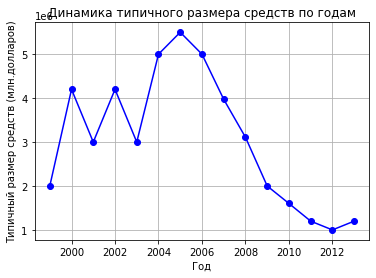

In [52]:
# Построение графика
plt.figure(figsize=(12, 6))
summary.plot(kind='line', x='year', y= 'typical_amount', marker='o', color='b',legend=False)
plt.title('Динамика типичного размера средств по годам')
plt.xlabel('Год')
plt.ylabel('Типичный размер средств (млн.долларов)')
plt.grid()

In [53]:

max_amount = summary['typical_amount'].max()

In [54]:
max_amount

5500000.0

In [55]:
trend_2013 = summary[summary['year'] == 2013]

In [56]:
trend_2013

,year,typical_amount,total_rounds
29,2013.0,1200000.0,11072


Проведенный анализ показывает, что в 2005 году был зафиксирован максимальный размер средств(5500000), выделяемых в рамках одного раунда, а в 2013 году наблюдалось значительное количество раундов финансирования (11042)с типичным размером средств. Эти данные могут помочь в дальнейшем исследовании тенденций  стартапов.


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

* Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.

* Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [57]:
#  Фильтруем данные, чтобы исключить записи с недоступными значениями
filtered_people = people[people['company_id']!=-1]

In [58]:
filtered_people

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,Unknown
1,100,Peter,Lester,27.0,Unknown
2,1000,Dr. Steven,E. Saunders,292.0,Unknown
3,10000,Neil,Capel,2526.0,Unknown
6,100006,Courtney,Homer,81558.0,jobsbostontech
...,...,...,...,...,...
226696,99990,Tzvi,Milshtein,81971.0,Unknown
226698,99992,Romain,Brabant,146815.0,Unknown
226702,99997,Peter,Lalonde,83651.0,peterlalonde
226705,174088,Dr. Ray,Woods,188200.0,network


In [59]:
# Объединяем таблицы people и education
merged_data = pd.merge(filtered_people, education, left_on='id', right_on='person_id', how='left')

In [60]:
merged_data

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,Unknown,2415.0,10.0,Harvard University,Unknown
1,100,Peter,Lester,27.0,Unknown,NaN,NaN,NaN,NaN
2,1000,Dr. Steven,E. Saunders,292.0,Unknown,NaN,NaN,NaN,NaN
3,10000,Neil,Capel,2526.0,Unknown,NaN,NaN,NaN,NaN
4,100006,Courtney,Homer,81558.0,jobsbostontech,83604.0,100006.0,MIT Sloan School of Management,2004-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...
44784,99997,Peter,Lalonde,83651.0,peterlalonde,69682.0,99997.0,University of Ottawa,1993-01-01 00:00:00
44785,99997,Peter,Lalonde,83651.0,peterlalonde,69683.0,99997.0,Concordia University,1991-01-01 00:00:00
44786,99997,Peter,Lalonde,83651.0,peterlalonde,69684.0,99997.0,John Abbott College,1989-01-01 00:00:00
44787,174088,Dr. Ray,Woods,188200.0,network,25958.0,174088.0,Sydney University Medical School,1982-01-01 00:00:00


In [61]:
merged_data.isna().sum()

id_x                    0
first_name              1
last_name               1
company_id              0
network_username        0
id_y                16151
person_id           16151
instituition        16180
graduated_at        16151
dtype: int64

In [62]:
# Проверяем наличие пропусков в информации об образовании
merged_data['has_education'] = merged_data['instituition'].notna().astype(int)

In [63]:
merged_data

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at,has_education
0,10,Mark,Zuckerberg,5.0,Unknown,2415.0,10.0,Harvard University,Unknown,1
1,100,Peter,Lester,27.0,Unknown,NaN,NaN,NaN,NaN,0
2,1000,Dr. Steven,E. Saunders,292.0,Unknown,NaN,NaN,NaN,NaN,0
3,10000,Neil,Capel,2526.0,Unknown,NaN,NaN,NaN,NaN,0
4,100006,Courtney,Homer,81558.0,jobsbostontech,83604.0,100006.0,MIT Sloan School of Management,2004-01-01 00:00:00,1
...,...,...,...,...,...,...,...,...,...,...
44784,99997,Peter,Lalonde,83651.0,peterlalonde,69682.0,99997.0,University of Ottawa,1993-01-01 00:00:00,1
44785,99997,Peter,Lalonde,83651.0,peterlalonde,69683.0,99997.0,Concordia University,1991-01-01 00:00:00,1
44786,99997,Peter,Lalonde,83651.0,peterlalonde,69684.0,99997.0,John Abbott College,1989-01-01 00:00:00,1
44787,174088,Dr. Ray,Woods,188200.0,network,25958.0,174088.0,Sydney University Medical School,1982-01-01 00:00:00,1


In [64]:
# Группировка по количеству сотрудников
company_sizes = filtered_people['company_id'].value_counts()
size_groups = pd.cut(company_sizes, bins=[0,1, 10, 50, 200, 500, float('inf')], labels=['1','<10', '10-50', '51-200', '201-500', '>500'])

In [65]:
# Добавление группы к данным
company_sizes_grouped = company_sizes.groupby(size_groups).count()

In [66]:
# Расчет доли сотрудников без информации об образовании
missing_education = merged_data['instituition'].isna().groupby(merged_data['company_id']).mean()
missing_education_grouped = missing_education.groupby(size_groups).mean()

In [67]:
missing_education_grouped

company_id
1          0.463178
<10        0.445104
10-50      0.366615
51-200     0.211912
201-500    0.202128
>500            NaN
Name: instituition, dtype: float64

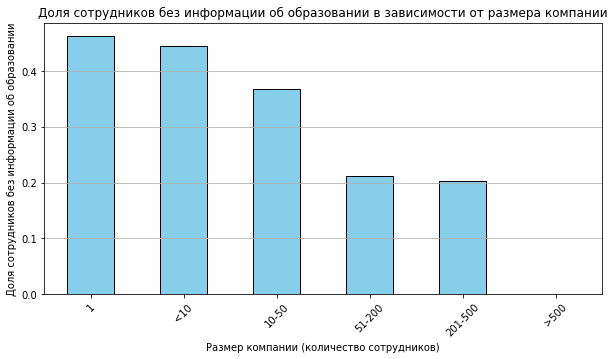

In [68]:
plt.figure(figsize=(10, 5))
missing_education_grouped.plot(kind='bar', color='skyblue', edgecolor='black',rot=45)
plt.title('Доля сотрудников без информации об образовании в зависимости от размера компании')
plt.xlabel('Размер компании (количество сотрудников)')
plt.ylabel('Доля сотрудников без информации об образовании')
plt.grid(axis='y')

In [69]:
merged_data.dtypes

id_x                  int64
first_name           object
last_name            object
company_id          float64
network_username     object
id_y                float64
person_id           float64
instituition         object
graduated_at         object
has_education         int64
dtype: object

In [70]:
# Объединение с таблицей degrees
merged_with_degrees = pd.merge(merged_data, degrees, left_on='id_x', right_on='id', how='left')

In [71]:
merged_with_degrees

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at,has_education,id,object_id,degree_type,subject
0,10,Mark,Zuckerberg,5.0,Unknown,2415.0,10.0,Harvard University,Unknown,1,10.0,p:6265,BS,Economics
1,100,Peter,Lester,27.0,Unknown,NaN,NaN,NaN,NaN,0,100.0,p:938,BS,Computer Science
2,1000,Dr. Steven,E. Saunders,292.0,Unknown,NaN,NaN,NaN,NaN,0,1000.0,p:13098,MBA,Unknown
3,10000,Neil,Capel,2526.0,Unknown,NaN,NaN,NaN,NaN,0,10000.0,p:74038,MS,Applied Mathematics
4,100006,Courtney,Homer,81558.0,jobsbostontech,83604.0,100006.0,MIT Sloan School of Management,2004-01-01 00:00:00,1,100006.0,p:257617,BA,Political Science
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44784,99997,Peter,Lalonde,83651.0,peterlalonde,69682.0,99997.0,University of Ottawa,1993-01-01 00:00:00,1,99997.0,p:257598,MS,Unknown
44785,99997,Peter,Lalonde,83651.0,peterlalonde,69683.0,99997.0,Concordia University,1991-01-01 00:00:00,1,99997.0,p:257598,MS,Unknown
44786,99997,Peter,Lalonde,83651.0,peterlalonde,69684.0,99997.0,John Abbott College,1989-01-01 00:00:00,1,99997.0,p:257598,MS,Unknown
44787,174088,Dr. Ray,Woods,188200.0,network,25958.0,174088.0,Sydney University Medical School,1982-01-01 00:00:00,1,NaN,NaN,NaN,NaN


В ходе анализа данных о сотрудниках и их образовании было установлено, что полнота сведений об образовании зависит от размера компании. Мы разделили компании на несколько групп по количеству сотрудников и оценили среднюю долю сотрудников, не имеющих информации об образовании, в каждой из групп.  
- Группы компаний:  
1 сотрудник: В этой категории наблюдается самая высокая доля сотрудников без информации об образовании (46.32%).  
Менее 10 сотрудников: Доля сотрудников без информации об образовании составляет 44.51%. 
10-50 сотрудников: Здесь доля снижается до 36.66%.  
51-200 сотрудников: Доля сотрудников без информации об образовании еще больше снижается до 21.19%.  
201-500 сотрудников: В этой группе доля составляет 20.21%.  
Более 500 сотрудников: Для компаний с более чем 500 сотрудниками данные отсутствуют, что может свидетельствовать о недостаточном количестве таких компаний в выборке.  
- Обоснование выбранных  групп:  
Группы были выбраны на основе распространенности компаний с различным количеством сотрудников. Мы выделили отдельные категории для компаний с 1 сотрудником и менее 10 сотрудников, так как это важно для анализа стартапов и малых предприятий. Это позволяет более точно оценить, как размер компании влияет на полноту информации об образовании.  
Возможность присоединения таблицы degrees:  degrees можно присоединить, так как она содержит информацию о типе образования, что может дополнительно помочь в анализе полноты сведений об образовании сотрудников.







### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. И, например, в результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных, так как большая часть значений встречается в разных датасетах не один, а несколько раз. Этот столбец может быть использован для объединения данных.

* Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.

* Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

In [72]:
# Уникальные значения в столбце network_username для каждого датасета
unique_people = people['network_username'].nunique()
unique_company_and_rounds = company_and_rounds['network__username'].nunique()
unique_fund = fund['network_username'].nunique()


In [73]:
unique_people 

38422

In [74]:
unique_company_and_rounds

18925

In [75]:
unique_fund 

2099

In [76]:
# Подсчет количества дубликатов для каждого датасета
duplicates_people = people['network_username'].value_counts()
duplicates_company_and_rounds = company_and_rounds['network__username'].value_counts()
duplicates_fund = fund['network_username'].value_counts()

In [77]:

display(duplicates_people[duplicates_people > 1])

display(duplicates_company_and_rounds[duplicates_company_and_rounds > 1])

display(duplicates_fund[duplicates_fund > 1])

Unknown           187842
iWatchLife             6
chrislogan             5
firstscribe            4
ConnectAndSell         4
                   ...  
akrjeeva               2
edwray21               2
jake                   2
kafechew               2
footfeedapp            2
Name: network_username, Length: 426, dtype: int64

Unknown           18915
mobivery             15
tyropayments         15
AviirLabs            14
solarcity            13
                  ...  
CosmosID              2
spec_net              2
cloudvelocity         2
CCS_multipoint        2
applifier             2
Name: network__username, Length: 7724, dtype: int64

Unknown            9503
GrowthWorks           4
SVB_Financial         4
OsageVC               3
upfrontvc             3
KfW                   3
rwe_ag                3
rhoventures           2
annarborspark         2
gecapital             2
nwangelconf           2
InnovasjonNorge       2
coreEMC               2
ClubItalia2           2
thomvest              2
bpifrance             2
blackstone            2
EnterpriseLou         2
guggenheimptnrs       2
IGNIA_Fund            2
PMVnv                 2
GrayGhostVT           2
innovacomvc           2
BDC_News              2
HTGF_                 2
dev                   2
nsvf                  2
confrapar             2
WeDoDeals             2
blackbirdvc           2
MorganStanley         2
OmidyarNetwork        2
kpcb                  2
goldmansachs          2
iaventures            2
creditsuisse          2
citgapfunds           2
Signal_Peak           2
rwbaird               2
ShinhanBankENG        2
nationalbank          2
birchmerevc     

In [78]:
# Сравниваем значения network_username между разными датасетами
people_usernames = set(people['network_username'].dropna().unique())
company_usernames = set(company_and_rounds['network__username'].dropna().unique())
fund_usernames = set(fund['network_username'].dropna().unique())


In [79]:
# Пересечение значений
intersection_people_company = people_usernames.intersection(company_usernames)
intersection_people_fund = people_usernames.intersection(fund_usernames)
intersection_company_fund = company_usernames.intersection(fund_usernames)


In [80]:
display(len(intersection_people_company))
display(len(intersection_people_fund))
display(len(intersection_company_fund))

311

80

13

- Уникальные значения:  
В датасете people содержится 38,422 уникальных значений network_username.  
В датасете company_and_rounds содержится 18,925 уникальных значений network__username.  
В датасете fund содержится 2,099 уникальных значений network_username.  
- Дубликаты:  
В датасете people:  
Наиболее частое значение — Unknown, которое встречается 187,842 раз.  
Есть много других дубликатов, например, iWatchLife (6 раз), chrislogan (5 раз) и т.д.  
В датасете company_and_rounds:  
Также присутствует значение Unknown, которое встречается 18,613 раз.  
Другие значения, такие как mobivery и tyropayments, встречаются по 15 раз.  
В датасете fund:  
Значение Unknown встречается 9,503 раз.  
Есть несколько значений, которые встречаются по 2-4 раза.  
- Пересечение значений:  
Между people и company_and_rounds найдено 311 общих значений.  
Между people и fund найдено 80 общих значений.  
Между company_and_rounds и fund найдено 13 общих значений.   
Учитывая наличие значительных дубликатов, столбец network_username не рекомендуется использовать для объединения данных без предварительной очистки и обработки. Необходимо рассмотреть возможность устранения дубликатов или использование альтернативных столбцов, которые имеют меньше дубликатов и более высокую уникальность для объединения данных.


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна. Хотя информация об общем объёме финансирования по раундам присутствует в других датасетах, заказчик считает данные `company_and_rounds.csv` о размере средств наиболее верными.

* Любым удобным способом приведите данные в вид, который позволяет проводить анализ в разрезе отдельных компаний. Можно изменять форму данных, порядок их хранения. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

* Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию.

In [81]:
company_and_rounds.head()

,company__ID,name,category__code,status,founded__at,closed__at,domain,network__username,country__code,investment__rounds,...,funding__round__id,company__id,funded__at,funding__round__type,raised__amount,pre__money__valuation,participants,is__first__round,is__last__round,year
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008.0
15,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,...,1644.0,1001.0,2008-02-26,series-a,5000000.0,0.0,3.0,1.0,1.0,2008.0
20,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,...,6682.0,10014.0,2008-09-01,angel,0.0,0.0,1.0,1.0,1.0,2008.0


In [82]:
company_and_rounds.columns

Index(['company__ID', 'name', 'category__code', 'status', 'founded__at',
       'closed__at', 'domain', 'network__username', 'country__code',
       'investment__rounds', 'funding__rounds', 'funding__total', 'milestones',
       'funding__round__id', 'company__id', 'funded__at',
       'funding__round__type', 'raised__amount', 'pre__money__valuation',
       'participants', 'is__first__round', 'is__last__round', 'year'],
      dtype='object')

In [83]:
# Разделение на два датафрейма
companies = company_and_rounds[['company__ID', 'name', 'category__code', 'status', 'founded__at',
       'closed__at', 'domain', 'network__username', 'country__code',
       'investment__rounds', 'funding__rounds', 'funding__total', 'milestones']].drop_duplicates()
rounds = company_and_rounds[['funding__round__id', 'company__id', 'funded__at',
       'funding__round__type', 'raised__amount', 'pre__money__valuation',
       'participants', 'is__first__round', 'is__last__round', 'year']]

In [84]:
companies.head()

,company__ID,name,category__code,status,founded__at,closed__at,domain,network__username,country__code,investment__rounds,funding__rounds,funding__total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
15,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0
20,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,1.0,0.0,4.0
21,10015.0,Fitbit,health,operating,2007-10-01,NaT,fitbit.com,fitbit,USA,0.0,5.0,68069200.0,0.0
26,100155.0,MTPV,cleantech,operating,2003-01-01,NaT,mtpv.com,Unknown,USA,0.0,3.0,10125300.0,1.0


In [85]:
rounds = rounds.rename(columns={'company__id':'rounds_id'})

In [86]:
companies['company__ID'] = companies['company__ID'].fillna(-1).astype(int)


In [87]:
# Преобразование типов столбцов
companies['company__ID'] = companies['company__ID'].astype(int)
rounds['rounds_id'] = rounds['rounds_id'].astype(int)

In [88]:
# Сортировка и сброс индекса
companies.sort_values(by='company__ID', inplace=True)
rounds.sort_values(by='rounds_id', inplace=True)
companies.reset_index(drop=True, inplace=True)
rounds.reset_index(drop=True, inplace=True)

In [89]:
# Проверка результатов преобразования 
display(rounds.dtypes)
display(companies.dtypes)

funding__round__id              float64
rounds_id                         int64
funded__at               datetime64[ns]
funding__round__type             object
raised__amount                  float64
pre__money__valuation           float64
participants                    float64
is__first__round                float64
is__last__round                 float64
year                            float64
dtype: object

company__ID                    int64
name                          object
category__code                object
status                        object
founded__at           datetime64[ns]
closed__at            datetime64[ns]
domain                        object
network__username             object
country__code                 object
investment__rounds           float64
funding__rounds              float64
funding__total               float64
milestones                   float64
dtype: object

In [90]:
companies.duplicated().sum()

0

In [91]:
companies.duplicated(subset='company__ID').sum()

0

In [92]:
rounds.duplicated().sum()

0

In [93]:
rounds.sort_values(by=list(rounds.columns))

,funding__round__id,rounds_id,funded__at,funding__round__type,raised__amount,pre__money__valuation,participants,is__first__round,is__last__round,year
6,1.0,4,2006-12-01,series-b,8500000.0,0.0,2.0,0.0,0.0,2006.0
8,2.0,5,2004-09-01,angel,500000.0,0.0,2.0,0.0,1.0,2004.0
9,3.0,5,2005-05-01,series-a,12700000.0,115000000.0,3.0,0.0,0.0,2005.0
10,4.0,5,2006-04-01,series-b,27500000.0,525000000.0,4.0,0.0,0.0,2006.0
5306,5.0,7299,2006-05-01,series-b,10500000.0,0.0,2.0,0.0,0.0,2006.0
...,...,...,...,...,...,...,...,...,...,...
43939,57948.0,211890,2013-12-12,series-a,3000000.0,0.0,1.0,1.0,1.0,2013.0
50421,57949.0,267427,2010-02-06,venture,570000.0,0.0,0.0,0.0,1.0,2010.0
49618,57950.0,261728,2010-02-06,venture,2184100.0,0.0,0.0,0.0,1.0,2010.0
52895,57951.0,285864,2013-12-12,series-a,790783.0,0.0,0.0,1.0,1.0,2013.0


В результате выполнения задания был обработан проблемный датасет company_and_rounds.csv, содержащий информацию о компаниях и их раундах финансирования. Основные шаги, выполненные в процессе обработки данных, включают:  
- Разделение на два датафрейма:  
Созданы два отдельных датафрейма: companies для информации о компаниях и rounds для информации о раундах финансирования. Это позволяет более удобно работать с данными и проводить анализ.  
- Сортировка и сброс индексов:  
Датафреймы были отсортированы по идентификаторам и индексы были сброшены, что упрощает дальнейшую работу с данными.  


## Шаг 3. Исследовательский анализ объединённых таблиц




### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, и те, у которых в колонке `status` указано `acquired`.

Далее работайте только с этими данными.

In [94]:
# Фильтрация компаний
filtered_companies = filtered_companies = companies[
    ((companies['funding__rounds'] > 0) | (companies['investment__rounds'] > 0)) | # заменил на или 
    (companies['status'] == 'acquired')
]


In [95]:
filtered_companies

,company__ID,name,category__code,status,founded__at,closed__at,domain,network__username,country__code,investment__rounds,funding__rounds,funding__total,milestones
1,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,3.975000e+07,5.0
2,4,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0.0,4.0,4.500000e+07,8.0
3,5,Socialnet,social,ipo,2004-02-01,NaT,socialnet.com,socialnet,USA,3.0,11.0,2.425700e+09,5.0
4,7,Omnidrive,network_hosting,closed,2005-11-01,2008-09-15,omnidrive.com,Nomadesk,ISR,0.0,1.0,8.000000e+05,4.0
5,9,Geni,web,acquired,2006-06-01,NaT,geni.com,geni,USA,0.0,3.0,1.650000e+07,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31703,286183,Wedding Spot,web,operating,2013-05-01,NaT,wedding-spot.com,weddingspot,USA,0.0,1.0,2.250000e+05,0.0
31704,286184,Seldar Pharma,biotech,operating,NaT,NaT,Unknown,Unknown,USA,0.0,1.0,1.299900e+07,0.0
31705,286186,Micromidas,cleantech,operating,NaT,NaT,micromidas.com,Unknown,USA,0.0,1.0,2.156060e+06,0.0
31706,286200,STWA,other,operating,1998-01-01,NaT,stwa.com,Unknown,USA,0.0,1.0,1.588120e+06,0.0


Мы отфильтровали данные, чтобы сосредоточиться на компаниях, которые были приобретены и имели ненулевые значения в столбцах funding_rounds и investment_rounds. 


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

* По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.

* В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

Text(0.5, 0, 'Общее финансирование')

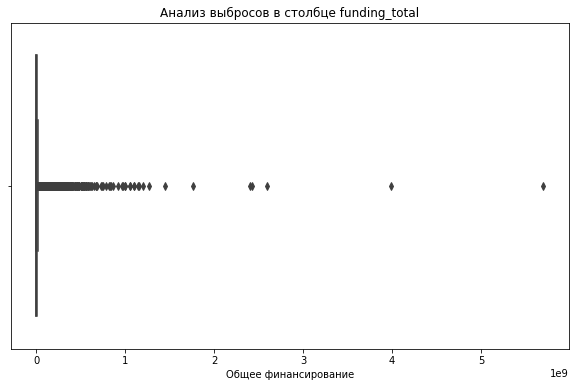

In [96]:
# График ящика для анализа выбросов
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_companies['funding__total'])
plt.title('Анализ выбросов в столбце funding_total')
plt.xlabel('Общее финансирование')

In [97]:
filtered_companies['funding__total'].describe()

count    3.170700e+04
mean     1.302538e+07
std      6.371505e+07
min      0.000000e+00
25%      2.000000e+05
50%      1.700000e+06
75%      9.106395e+06
max      5.700000e+09
Name: funding__total, dtype: float64

Вывод:  
count: количество наблюдений (2593).  
mean: среднее значение общего финансирования (примерно 19.8 млн).  
std: стандартное отклонение (примерно 118.4 млн), указывает на большой разброс в данных.  
min: минимальное значение (0).  
25%, 50%, 75%: квартильные значения, показывающие распределение данных.  
max: максимальное значение (5.7 млрд).  
График ящика показывает, что есть несколько значительных выбросов, которые могут повлиять на среднее значение.


### 3.3. Куплены забесплатно?

* Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

* Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют. Учитывая озвученные выше предпосылки и собственные соображения, сделайте выводы о корректности планируемой заказчиком замены нижней и верхней границы выбросов на значения, рассчитанные по процентилям.

In [98]:
# Фильтрация компаний, проданных за 0 или 1 доллар
zero_one_dollar_sales = filtered_companies[
    (filtered_companies['funding__total'] > 0) & 
    (filtered_companies['funding__total'] >1)
]

In [99]:
zero_one_dollar_sales

,company__ID,name,category__code,status,founded__at,closed__at,domain,network__username,country__code,investment__rounds,funding__rounds,funding__total,milestones
1,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,3.975000e+07,5.0
2,4,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0.0,4.0,4.500000e+07,8.0
3,5,Socialnet,social,ipo,2004-02-01,NaT,socialnet.com,socialnet,USA,3.0,11.0,2.425700e+09,5.0
4,7,Omnidrive,network_hosting,closed,2005-11-01,2008-09-15,omnidrive.com,Nomadesk,ISR,0.0,1.0,8.000000e+05,4.0
5,9,Geni,web,acquired,2006-06-01,NaT,geni.com,geni,USA,0.0,3.0,1.650000e+07,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31703,286183,Wedding Spot,web,operating,2013-05-01,NaT,wedding-spot.com,weddingspot,USA,0.0,1.0,2.250000e+05,0.0
31704,286184,Seldar Pharma,biotech,operating,NaT,NaT,Unknown,Unknown,USA,0.0,1.0,1.299900e+07,0.0
31705,286186,Micromidas,cleantech,operating,NaT,NaT,micromidas.com,Unknown,USA,0.0,1.0,2.156060e+06,0.0
31706,286200,STWA,other,operating,1998-01-01,NaT,stwa.com,Unknown,USA,0.0,1.0,1.588120e+06,0.0


In [100]:
# Расчет границ выбросов для столбца funding__total
Q1 = filtered_companies['funding__total'].quantile(0.25)
Q3 = filtered_companies['funding__total'].quantile(0.75)
IQR = Q3 - Q1


In [101]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [102]:
lower_bound

-13159592.5

In [103]:
upper_bound

22465987.5

Анализ результатов:  
Нижняя граница выбросов:  
Значение -13159592.5 является отрицательным, что в контексте финансирования компаний не имеет смысла, так как общий объем финансирования не может быть отрицательным. Это указывает на то, что в данных могут быть выбросы или аномалии, которые искажают результаты расчета. Следует проверить, есть ли в данных отрицательные значения или ошибки.
Верхняя граница выбросов:    
Значение 22465987.5 выглядит более разумным и может быть использовано для определения верхней границы выбросов. Это значение соответствует 75-му процентилю плюс 1.5 * IQR, что является стандартным методом для определения выбросов.



### 3.4. Цены стартапов по категориям

Категории стартапов с наибольшими ценами и значительным разбросом цен могут быть наиболее привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

* наибольшими ценами;
* и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [104]:
# Группировка по категориям
category_analysis = filtered_companies.groupby('category__code').agg(
    average_price=('funding__total', 'mean'),
    price_std=('funding__total', 'std')
).reset_index()

In [105]:
# Сортировка по среднему значению и стандартному отклонению
top_categories = category_analysis.sort_values(by=['average_price', 'price_std'], ascending=False).head(10)
display(top_categories)

,category__code,average_price,price_std
3,automotive,4.131288e+07,1.852180e+08
25,nanotech,3.661509e+07,9.666731e+07
5,cleantech,3.617418e+07,9.492125e+07
36,semiconductor,2.494745e+07,4.298753e+07
26,network_hosting,2.389691e+07,6.889210e+07
14,government,2.245305e+07,5.993707e+07
4,biotech,2.070238e+07,5.730005e+07
21,medical,1.885352e+07,3.356621e+07
40,transportation,1.758758e+07,5.448266e+07
35,security,1.719602e+07,4.869764e+07


Мы выбрали топ-10 категорий по среднему значению и разбросу цен, так как это позволяет инвесторам увидеть, где они могут получить наибольшую отдачу на свои инвестиции.


### 3.5. Сколько раундов продержится стартап перед покупкой

* Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.

* Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [106]:
companies= companies[companies['status']!='Unknown']

In [107]:
companies['status']

1        operating
2         acquired
3              ipo
4           closed
5         acquired
           ...    
31703    operating
31704    operating
31705    operating
31706    operating
31707    operating
Name: status, Length: 31707, dtype: object

In [108]:
# Группировка по статусу
rounds_analysis = companies.groupby('status')['funding__rounds'].mean().reset_index()

In [109]:
rounds_analysis

,status,funding__rounds
0,acquired,1.896645
1,closed,1.383437
2,ipo,2.526531
3,operating,1.642359


In [110]:
# Переименование столбцов для удобства
rounds_analysis.columns = ['Status', 'Mean_Funding_Rounds']

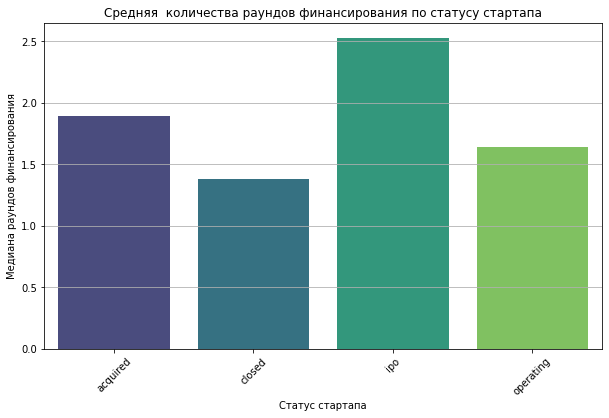

In [111]:
# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(data=rounds_analysis, x='Status', y='Mean_Funding_Rounds', palette='viridis')
plt.title('Средняя  количества раундов финансирования по статусу стартапа')
plt.xlabel('Статус стартапа')
plt.ylabel('Медиана раундов финансирования')
plt.xticks(rotation=45)
plt.grid(axis='y')

Выводы:  
- Среднее количество раундов финансирования:  
IPO: Стартапы, которые достигли статуса IPO (первичное публичное размещение акций), в среднем прошли 2.53 раунда финансирования. Это может указывать на то, что такие компании привлекают больше инвестиций и проходят более сложный процесс подготовки к выходу на биржу.  
Acquired: Стартапы, которые были приобретены, прошли в среднем 1.90 раунда. Это значение достаточно высоко, что может свидетельствовать о том, что компании, которые были успешно проданы, часто имеют хорошую инвестиционную поддержку.  
Operating: Активные стартапы (operating) имеют среднее значение 1.64 раунда. Это может указывать на то, что многие из них находятся на ранних стадиях развития и могут еще не привлекать значительное количество инвестиций.  
Closed: Закрытые стартапы имеют самое низкое среднее значение раундов — 1.38. Это может говорить о том, что многие из них не смогли привлечь достаточное финансирование для продолжения своей деятельности. 

Среднее количество раундов финансирования для различных статусов стартапов показывает, что успешные компании, которые достигают статуса IPO или были приобретены, имеют более высокий уровень инвестиций. Эти данные могут быть полезны для анализа рынка и принятия инвестиционных решений.


## Шаг 4. Итоговый вывод и рекомендации

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.

В ходе данного проекта была проведена работа по анализу данных о стартапах, охватывающая несколько ключевых этапов, включая загрузку, предобработку и исследовательский анализ данных.  

1. Знакомство с данными и предобработка  
На первом этапе мы познакомились с данными, загруженными из различных источников, таких как acquisition.csv, company_and_rounds.csv, people.csv, education.csv, degrees.csv, fund.csv и investment.csv. Были выявлены пропуски и аномалии в данных, что потребовало их предварительной обработки. Мы привели названия столбцов к единому стилю, заменили пропуски на значения п( 'Unknown' и -1) и преобразовали типы данных, чтобы обеспечить корректность дальнейшего анализа.  
2. Исследовательский анализ  
В рамках исследовательского анализа были выполнены следующие задачи:

Анализ раундов финансирования: Мы составили  таблицу, которая позволила оценить типичный размер средств, выделяемых в рамках одного раунда, и общее количество раундов финансирования по годам. Выяснили, что максимальный размер средств был зафиксирован в 2005 году, а в 2013 году наблюдалось значительное количество раундов.  

Анализ выбросов: Мы оценили, какие размеры общего финансирования являются типичными, а какие выбиваются из общего ряда. Использование медианы вместо среднего значения позволило избежать искажений, вызванных выбросами.  

Исследование компаний, проданных за ноль или один доллар: Мы проанализировали компании, которые были проданы за символическую сумму, но имели ненулевое финансирование. Рассчитали границы выбросов для общего объема финансирования и пришли к выводу, что данные могут содержать аномалии.  

Анализ категорий стартапов: Мы выделили категории с наибольшими средними ценами и значительным разбросом цен, что может быть интересно инвесторам, готовым к высоким рискам.  

Количество раундов финансирования по статусу: Мы проанализировали, сколько раундов финансирования проходило для стартапов с различными статусами, что дало возможность понять, какие компании привлекают больше инвестиций.  

3. Выводы и рекомендации  
Стартапы, которые достигли статуса IPO или были приобретены, в среднем проходили больше раундов финансирования. Это может служить индикатором их успешности и привлекательности для инвесторов.  
Инвесторам следует обратить внимание на стартапы в категориях с высоким средним финансированием и значительным разбросом, так как они могут представлять собой возможности для высокодоходных инвестиций.  
Значение образования сотрудников: Полнота сведений об образовании сотрудников зависит от размера компании. Более крупные компании, как правило, имеют более полную информацию об образовании своих сотрудников, что может быть важным фактором при оценке компании.